# INSTALL DL2

In [ ]:
import numpy as np

In [ ]:
import torch
torch.manual_seed(0)
import random
random.seed(0)

# GET MODEL AND DATA

#### NEW DATA

In [ ]:
import numpy as np
import os
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from torch.utils.data import RandomSampler
import cv2
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import torchvision.models as models
import torch
from torch import nn
import time

import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PARAMS EXEC
# apply algorithm with test image with our without background
no_back_ground = True
model_no_bg = True

# data randomly mixed or not before use it
random_sampling = True



# Size of the window
window_size_ = 2
feature_extract_size = 7

In [ ]:
if no_back_ground:
  TEST_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/final_test_no_bg/'
  TRAIN_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/data_augm_train_final_no_bg/'
else:
  TEST_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/final_test/'
  TRAIN_PATH = '/content/drive/MyDrive/CS Work/projet CS/dataset/data_augm_train_final/'

classes = os.listdir(TEST_PATH)
classes.remove('.DS_Store')
print("Total Classes: ",len(classes))

train_count = 0
test_count = 0
for _class in classes:
    train_count += len(os.listdir(TRAIN_PATH + _class))
    test_count += len(os.listdir(TEST_PATH + _class))

print("Total train images: ", train_count)
print("Total test images: ", test_count)

Total Classes:  10
Total train images:  2614
Total test images:  109


In [ ]:
# get paths (with. name of each image)
train_imgs = []
test_imgs = []

for _class in classes:
    
    for img in os.listdir(TRAIN_PATH + _class):
        if img != '.DS_Store':
          train_imgs.append(TRAIN_PATH + _class + "/" + img)
        
    for img in os.listdir(TEST_PATH + _class):
      if img != '.DS_Store':
        test_imgs.append(TEST_PATH + _class + "/" + img)

class_to_int = {classes[i] : i for i in range(len(classes))}

In [ ]:
### Loading Classification Dataset - FOR METHOD 2: For multi-class data, by inheriting Dataset class

def get_transform():
    return T.Compose([T.ToTensor()])

class BirdDataset(Dataset):
    
    def __init__(self, imgs_list, class_to_int, transforms = None):
        
        super().__init__()
        self.imgs_list = imgs_list
        self.class_to_int = class_to_int
        self.transforms = transforms
        
        
    def __getitem__(self, index):
        transform = T.Resize(size = (224, 224))
        image_path = self.imgs_list[index]
        
        #Reading image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0

        
        #Retriving class label
        label = image_path.split("/")[-2]
        #print("label : " + str(label))
        label = self.class_to_int[label]
        
        #Applying transforms on image
        if self.transforms:
            image = self.transforms(image)
        
        image = transform(image)
        return image, label
        
        
        
    def __len__(self):
        return len(self.imgs_list)

In [ ]:
# Method 2: Using Dataset Class
train_dataset = BirdDataset(train_imgs, class_to_int, get_transform())
test_dataset = BirdDataset(test_imgs, class_to_int, get_transform())

#Data Loader  -  using Sampler (YT Video)
train_random_sampler = RandomSampler(train_dataset)
test_random_sampler = RandomSampler(test_dataset)

In [ ]:
#Shuffle Argument is mutually exclusive with Sampler!
train_iter = DataLoader(
    dataset = train_dataset,
    batch_size = 16,
    sampler = train_random_sampler,
    num_workers = 4,
)


if random_sampling:
  test_iter = DataLoader(
      dataset = test_dataset,
      batch_size = 16,
      sampler = test_random_sampler,
      num_workers = 4,
  )
else : 

  test_iter = DataLoader(
      dataset = test_dataset,
      batch_size = 16,
      sampler = None,
      num_workers = 4,
  )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
import os
from torchvision.utils import make_grid
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
## load mnist dataset
use_cuda = torch.cuda.is_available()

root = './data'
if not os.path.exists(root):
    os.mkdir(root)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


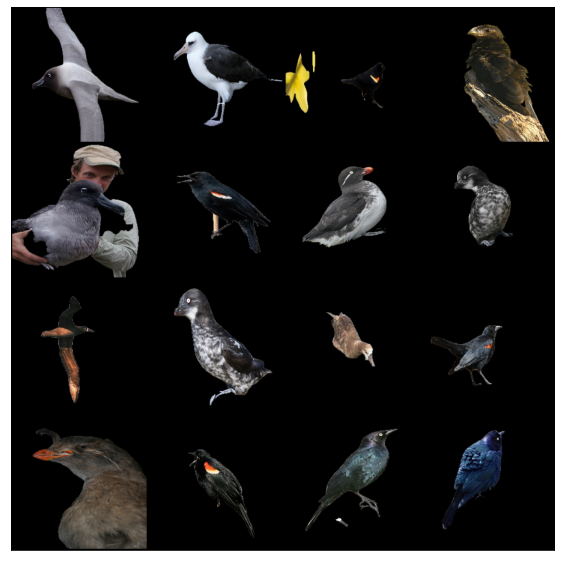

In [ ]:
for images, labels in test_iter:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
torch.cuda.empty_cache()
# load the model

if model_no_bg :
  print("Model train with no BG load")
  model2 = torch.load("/content/drive/MyDrive/CS Work/projet CS/dataset/VGG16_nobg.pt")
else :
  model2 = torch.load("/content/drive/MyDrive/CS Work/projet CS/dataset/VGG16.pt")

Model train with no BG load


In [ ]:
model2.to(device)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# get a batch
batch = next(iter(test_iter))
# indice 0 -> 7 indice 1 - > 2
batch[0] = batch[0].to(device) 
pred = model2(batch[0])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0


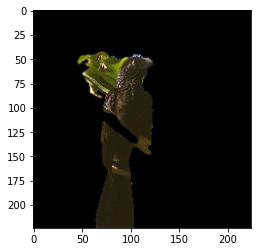

1


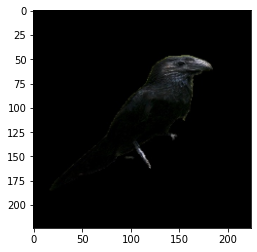

2


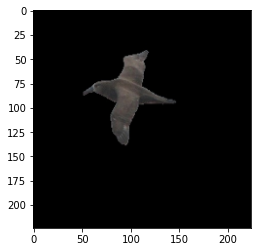

3


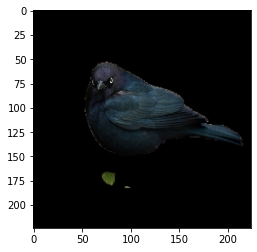

4


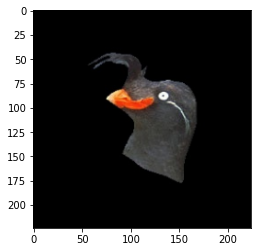

5


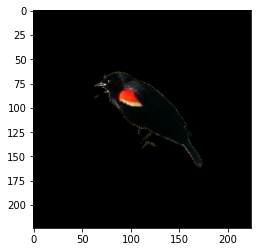

6


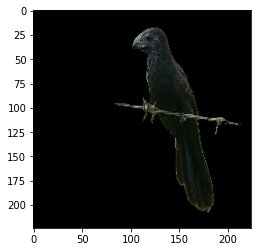

7


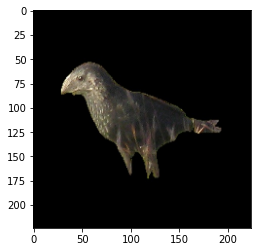

8


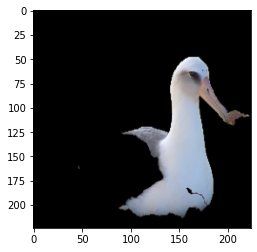

9


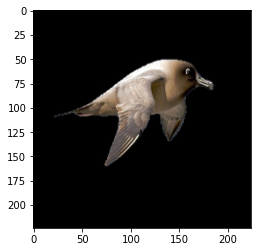

10


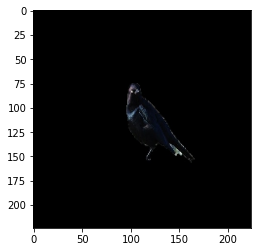

11


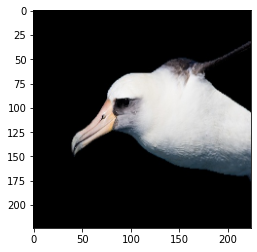

12


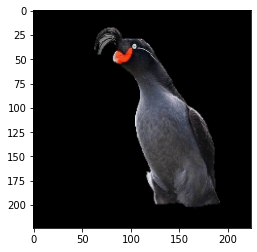

13


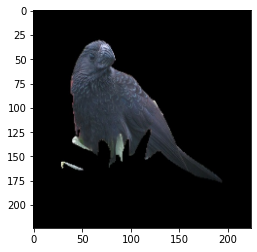

14


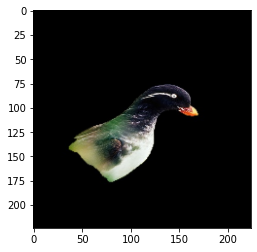

15


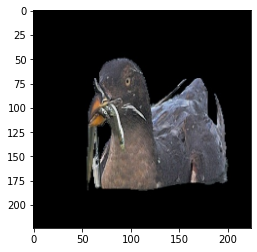

In [ ]:
for i in range(16):
  print(i)
  plt.imshow(batch[0][i].permute(1,2,0).tolist())
  plt.show()


# SPLIT OF THE NET (FEATURE EXTRACTOR AND CLASSIFIER)

In [ ]:
feature_extractor = model2.features #model2.features[:-1]
feature_extractor.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [ ]:
classifier = model2.classifier #nn.Sequential(model2.features[-1], model2.classifier)
classifier.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=25088, out_features=2048, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=2048, out_features=524, bias=True)
  (5): ReLU(inplace=True)
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=524, out_features=10, bias=True)
)

# EXTRACT FEATURES

In [ ]:
batch[0].to(device).shape

torch.Size([16, 3, 224, 224])

In [ ]:
batch[0].to(device)
features = feature_extractor(batch[0])
features.shape

torch.Size([16, 512, 7, 7])

# Utils functions

In [ ]:
def reshape_features(features):
  feat_reshape = features.reshape(
      ( features.shape[0],  features.shape[1],  features.shape[2] * features.shape[3])
      )
  return feat_reshape

#shape_0_feat_reshape = torch.zeros(feat_reshape.shape)

In [ ]:
def reshape_for_classifier(new_features):
  new_features_reshape = new_features.reshape(
                ( new_features.shape[0],  new_features.shape[1],
                int(np.sqrt(new_features.shape[2])), int(np.sqrt(new_features.shape[2])))
                )
  return new_features_reshape

In [ ]:
# filter onpossible injection


def remove_incoherent_origine_index(list_index, window_size, feature_extract_size):
  """
  This function will remove the original indexes of the windows according to their size.
  This will allow us to reduce the overlap of windows
  """
  list_index = [x for x in list_index if x % window_size_ == 0]
  list_index = [x for x in list_index if (x//feature_extract_size) % window_size_ == 0]
  return list_index

# FOUND THE COMBINAISON OF MODIFICATION

In [ ]:
features = feature_extractor(batch[0])
features.shape

torch.Size([16, 512, 7, 7])

In [ ]:
features_reshape = reshape_features(features)

In [ ]:
features_reshape.shape

torch.Size([16, 512, 49])

In [ ]:
# get the number of features to try to make all possibles combinaisons
number_features = features_reshape.shape[2]

In [ ]:
# indice 0 -> 9 indice 1 - > 3

modif_indice = 5 # indice on the batch of the element modify
inserting_indice = 6 # indice in the batch of the element which injected

source_class = int(torch.argmax(classifier(features)[modif_indice])) # argmax for the inserting_indice 
arg_inserting = int(torch.argmax(classifier(features)[inserting_indice])) # argmax for the inserting_indice 
print("pred for inserting : "+str(arg_inserting))
print("pred for modif : "+str(source_class))

best_pred = float(classifier(features)[0][2])
best_injection_tuple = (0,0)

# list possible injection and inserting index
list_possible_injection_modif_indice = list(range(number_features))
list_possible_injection_inserting_indice = list(range(number_features))

# filter incoherent val of origin
list_possible_injection_modif_indice = remove_incoherent_origine_index(list_index=list_possible_injection_modif_indice, window_size=window_size_, feature_extract_size=7)
list_possible_injection_inserting_indice = remove_incoherent_origine_index(list_index=list_possible_injection_inserting_indice, window_size=window_size_, feature_extract_size=7)

# list of all modifications
all_tuple_of_injection = []


pred for inserting : 3
pred for modif : 0


In [ ]:
# check the prediction before doing the modifications for the modif
source_class = torch.argmax(classifier(features)[modif_indice]).item()
source_class

0

In [ ]:
# check the prediction before doing the modifications for the inserting
target_class = torch.argmax(classifier(features)[inserting_indice]).item()
target_class


3

In [ ]:
# fonction qui en fonction de la taille de la fenetre souhaiter va renvoyer tous les autres indices des images à injecter
def get_other_indices_of_window(indice, window_size, feature_extract_size):
  """
  Function which from a value of an index will return the set of other indices according to the desired win size
  """

  ligne = []
  all_indice = []

  # modulo for indice 
  modulo_base = indice // feature_extract_size

  # Check if we don't change line
  for val in range(window_size):
    if (indice + val) // feature_extract_size != modulo_base :
      # get previous value of val that don't change the modulo
      #print("the modulo has changed")
      window_size = val
      #print(window_size)
      break


  # each val of window
  for val in range(window_size):
    ligne.append(indice + val)

  # each val of the line
  for val_ligne in ligne:
    for val in range(window_size):

      # check if we do not exceed the size of the image
      if val_ligne + val * feature_extract_size < feature_extract_size**2: 
        all_indice.append(val_ligne + val * feature_extract_size)
  all_indice.sort()
  return all_indice




In [ ]:
def found_best_edit(features_reshape,
                    modif_indice,
                    inserting_indice,
                    arg_inserting,
                    best_pred,
                    best_injection_tuple,
                    list_possible_injection_modif_indice,
                    list_possible_injection_inserting_indice,
                    all_tuple_of_injection,
                    source_class):
  """
  function which try each possible combinaison of modif_indic and inserting_indice
  to maximise the prediction of the injection image
  """
  pred_has_not_changed = True
  # we want a least on change
  best_pred = float('-inf')

  # counter sur le nombre de modification interessantes
  counter_modif = 0
  # try all combinaison


  for i in list_possible_injection_modif_indice:
    for j in list_possible_injection_inserting_indice:
      injection_modif_indice = i # index of the part of the image that will be replaced
      injection_inserting_indice = j  # index of the part of the image that will be injected


      # get_list_for_both of id from the window
      list_window_injection_modif_indice = get_other_indices_of_window(indice = injection_modif_indice, window_size=window_size_, feature_extract_size=7)
      list_window_injection_inserting_indice = get_other_indices_of_window(indice = injection_inserting_indice, window_size=window_size_, feature_extract_size=7)

      # if they don't have the same nb of element we don't do injection by window
      if len(list_window_injection_modif_indice) != len(list_window_injection_inserting_indice):
        # only the indice of base in the list
        list_window_injection_modif_indice = [injection_modif_indice]
        list_window_injection_inserting_indice = [injection_inserting_indice]

      new_features = features_reshape.clone() # copy of the features_reshape

      # make the injection for each val of the window
      for size_list_window in range(len(list_window_injection_inserting_indice)):
        # indices 
        modif_indice_window = list_window_injection_modif_indice[size_list_window]
        inserting_indice_window = list_window_injection_inserting_indice[size_list_window]

        # add new value for each layer
        for k in range(features_reshape.shape[1]):
          # Change is made for each layer
          new_features[modif_indice][k][modif_indice_window] = features_reshape[inserting_indice][k][inserting_indice_window]
      # reshape
      new_features_reshape = reshape_for_classifier(new_features)

      # Prediction with the new feat
      preds = classifier(new_features_reshape)
      pred = preds[modif_indice][arg_inserting].item()

      #print("Prediction : "+str(preds[modif_indice].argmax()))
      
      # check if the pred has change (we can return directly)
      if preds[modif_indice].argmax() == arg_inserting :
        #print("prediction of imlage got class of inserting image : early stop", preds[modif_indice].argmax())

        # append in the list of injection each values of the window
        for size_list_window in range(len(list_window_injection_inserting_indice)):
          # get the values 
          modif_indice_window = list_window_injection_modif_indice[size_list_window]
          inserting_indice_window = list_window_injection_inserting_indice[size_list_window]
          all_tuple_of_injection.append((modif_indice_window, inserting_indice_window))

        best_injection_tuple = (injection_modif_indice, injection_inserting_indice)
        """
        # remove all the values from the window
        for el in list_window_injection_modif_indice:
          list_possible_injection_modif_indice.remove(el)
        for el in list_window_injection_inserting_indice:
          try : 
            list_possible_injection_inserting_indice.remove(el)
          except:
            print("ERRORRRR")
            print(el)
            print(list_possible_injection_inserting_indice)
        """
        
        print("PRED HAS CHANGE WITH TUPLE")
        pred_has_not_changed = False
        return new_features, pred, best_injection_tuple, list_possible_injection_modif_indice, list_possible_injection_inserting_indice, all_tuple_of_injection, pred_has_not_changed

      # check if the pred is interesting
      if pred >= best_pred:
        #print("modif trouvée pour la modif : "+str(counter_modif))
        counter_modif = counter_modif + 1
        best_pred = pred
        best_injection_tuple = (injection_modif_indice, injection_inserting_indice)
        #print("nouvelle meilleure pred : "+str(pred))

  # check if
  if counter_modif == 0 :
    print("WARNING : NOT ANY INTERESTING MODIFICATION")


  #### UPDDATE features_reshape with the best transformation

  # get_list_for_both of id from the window
  list_window_injection_modif_indice = get_other_indices_of_window(indice = best_injection_tuple[0], window_size=window_size_, feature_extract_size=7)
  list_window_injection_inserting_indice = get_other_indices_of_window(indice = best_injection_tuple[1], window_size=window_size_, feature_extract_size=7)

  # if they don't have the same nb of element we don't do injection by window
  if len(list_window_injection_modif_indice) != len(list_window_injection_inserting_indice):
    # only the indice of base in the list
    list_window_injection_modif_indice = [best_injection_tuple[0]]
    list_window_injection_inserting_indice = [best_injection_tuple[1]]


  # make the injection for each val of the window
  for size_list_window in range(len(list_window_injection_inserting_indice)):
      # indices 
      modif_indice_window = list_window_injection_modif_indice[size_list_window]
      inserting_indice_window = list_window_injection_inserting_indice[size_list_window]
      # add new value for each layer
      for k in range(features_reshape.shape[1]):
        # Change is made for each layer
        features_reshape[modif_indice][k][modif_indice_window] = features_reshape[inserting_indice][k][inserting_indice_window]
      
      print("remove indices : "+str(modif_indice_window)+" ; "+str(inserting_indice_window))

      # remove the val of the list of possibles injections
      try : 
        list_possible_injection_modif_indice.remove(modif_indice_window)
      except:
        print("not found for remove", modif_indice_window)
      try : 
        list_possible_injection_inserting_indice.remove(inserting_indice_window)
      except : 
        print("not found for remove", inserting_indice_window)

      # add in all tuple of injection
      all_tuple_of_injection.append((modif_indice_window, inserting_indice_window))


  print("Size of list of possible injections : "+ str(len(list_possible_injection_modif_indice)))
  print("ORIGIN OF WINDOW OF INJECTION : "+ str(best_injection_tuple))
  print("list possible modif : "+ str(list_possible_injection_modif_indice))
  print("list possible insert : "+ str(list_possible_injection_inserting_indice))

  # return new values
  return features_reshape, best_pred, best_injection_tuple, list_possible_injection_modif_indice, list_possible_injection_inserting_indice, all_tuple_of_injection, pred_has_not_changed


### Made edit until the prediction change

In [ ]:
# Doing the modifications until the chnage in the predicitions
pred_has_not_changed = True

counter_nb_modif = 0

while pred_has_not_changed :

  features_reshape, best_pred, best_injection_tuple,\
  list_possible_injection_modif_indice,\
    list_possible_injection_inserting_indice, all_tuple_of_injection, pred_has_not_changed = found_best_edit(features_reshape,
                      modif_indice,
                      inserting_indice,
                      arg_inserting,
                      best_pred,
                      best_injection_tuple,
                      list_possible_injection_modif_indice,
                      list_possible_injection_inserting_indice,
                      all_tuple_of_injection,
                      source_class)

  # print the nb of modification
  counter_nb_modif = counter_nb_modif + 1
  print("Number of modifications : "+ str(counter_nb_modif))
  # tcheck if the val of prediction has change
  if torch.argmax(classifier(reshape_for_classifier(features_reshape))[modif_indice]) == arg_inserting :
    print("break actived")
    break

remove indices : 16 ; 32
remove indices : 17 ; 33
not found for remove 17
not found for remove 33
remove indices : 23 ; 39
not found for remove 23
not found for remove 39
remove indices : 24 ; 40
not found for remove 24
not found for remove 40
Size of list of possible injections : 15
ORIGIN OF WINDOW OF INJECTION : (16, 32)
list possible modif : [0, 2, 4, 6, 14, 18, 20, 28, 30, 32, 34, 42, 44, 46, 48]
list possible insert : [0, 2, 4, 6, 14, 16, 18, 20, 28, 30, 34, 42, 44, 46, 48]
Number of modifications : 1
PRED HAS CHANGE WITH TUPLE
Number of modifications : 2
break actived


In [ ]:
features_reshape.shape

torch.Size([16, 512, 49])

In [ ]:
 # all injection
all_tuple_of_injection

[(16, 32), (17, 33), (23, 39), (24, 40), (2, 0), (3, 1), (9, 7), (10, 8)]

In [ ]:
torch.argmax(classifier(reshape_for_classifier(features_reshape))[modif_indice])

tensor(3, device='cuda:0')

# Translate the modification in the new coordinates : 

In [ ]:
def index_to_coordinates(index_test, size_shape):
  """
  function that translates the change coordinates in the tensor reshape into the original coordinates
  index_test : val of index in the the reshape tensor
  size_shape : size of the original shape (ex : 4 for a 4*4)
  """
  #index_test = index_test
  # columns indice
  col_indice = (index_test) % size_shape
  # line indice
  line_indice = int((index_test)/ size_shape)

  return (line_indice, col_indice)


In [ ]:
def get_original_indexes(indexes, INPUT_1, OUTPUT_SIZE):
    size_ratio = (int(INPUT_1[0]/OUTPUT_SIZE[0]), int(INPUT_1[1]/OUTPUT_SIZE[1]))
    original_indexes = []
    #print(size_ratio)

    for index in indexes:
        for i in range(size_ratio[0]):
            for j in range(size_ratio[1]):
                new_index = [index[0]*size_ratio[0], index[1]*size_ratio[1]]
                if new_index[0] + i < INPUT_1[0]:
                    new_index[0] += i
                if new_index[1] + j < INPUT_1[1]:
                    new_index[1] += j
                original_indexes.append(new_index)
    return original_indexes

In [ ]:
import matplotlib.pyplot as plt
def visualize_transformation(original_indexes, original_image):
    original_image = original_image.permute(1,2,0).tolist()
    highlighted_image = original_image.copy()



    for i,j in original_indexes:
      try:
        for k in range(3):
          highlighted_image[i][j][k] = max((highlighted_image[i][j][k]+0.3),1)
      except :
        print("impossible : "+str(i)+str(j))


    plt.imshow(highlighted_image)
    plt.show()
    
    return highlighted_image


In [ ]:
all_tuple_of_injection

[(16, 32), (17, 33), (23, 39), (24, 40), (2, 0), (3, 1), (9, 7), (10, 8)]

In [ ]:
injection_first_image = [x[0] for x in all_tuple_of_injection]
injection_second_image = [x[1] for x in all_tuple_of_injection]
injection_first_image
injection_second_image

[32, 33, 39, 40, 0, 1, 7, 8]

In [ ]:
# conversion des coordonnées de shape (16,) à (4,4) (par exemple)
size_shape = 7
coordinates_injection_first_image =  [index_to_coordinates(x, size_shape) for x in injection_first_image]
coordinates_injection_second_image =  [index_to_coordinates(x, size_shape) for x in injection_second_image]

coordinates_injection_first_image
coordinates_injection_second_image

[(4, 4), (4, 5), (5, 4), (5, 5), (0, 0), (0, 1), (1, 0), (1, 1)]

In [ ]:
# original indexes
INPUT_1 = (224,224)
OUTPUT_SIZE = (7,7)

In [ ]:
# get the original coordinates
index_original_coordinates_first_image = get_original_indexes(coordinates_injection_first_image, INPUT_1, OUTPUT_SIZE)
index_original_coordinates_second_image = get_original_indexes(coordinates_injection_second_image, INPUT_1, OUTPUT_SIZE)

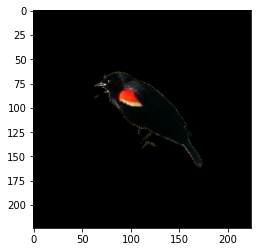

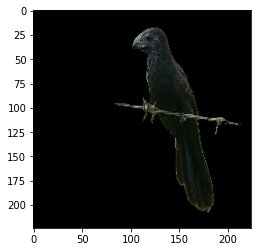

In [ ]:
# get the original images
"""
modif_indice = 13
inserting_indice =1
"""
original_first_image = batch[0][modif_indice]
original_second_image = batch[0][inserting_indice]

# plot
plt.figure()
plt.imshow(original_first_image.permute(1,2,0).tolist())
plt.figure()
plt.imshow(original_second_image.permute(1,2,0).tolist())

In [ ]:
inserting_indice, modif_indice

(6, 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


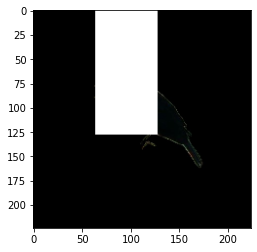

In [ ]:
img = visualize_transformation(index_original_coordinates_first_image, original_first_image)

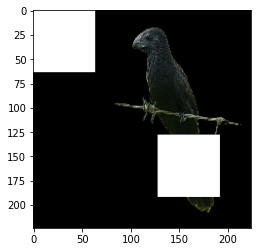

In [ ]:
img2 = visualize_transformation(index_original_coordinates_second_image, original_second_image)

# Combining images

In [ ]:
def combine_images(original_first_image, original_second_image, INPUT_1, OUTPUT_SIZE):
  """
  function thet matches by injecting the parts of the image 2 in the image 1
  params:
    original_first_image: the first image (modif image)
    original_second_image: the second image (injecting image)
    INPUT_1: size of the input image in the net (ex : (28,28))
    OUTPUT_SIZE : size of the output at the end of the feature extractor (ex: (4,4))

  """
  #original_second_image used also
  original_image_test = original_first_image.permute(1,2,0).tolist()
  printed_image = original_image_test.copy()
  # change struct sec image
  original_second_image = original_second_image.permute(1,2,0).tolist()
  for k in range(len(coordinates_injection_first_image)):
    first_image = get_original_indexes(coordinates_injection_first_image[k:k+1], INPUT_1, OUTPUT_SIZE)
    second_image = get_original_indexes(coordinates_injection_second_image[k:k+1], INPUT_1, OUTPUT_SIZE)

    # les indexes are sorted by columns and by line before doing the matching
    first_image = sorted(first_image, key=lambda x: x[1])
    first_image = sorted(first_image, key=lambda x: x[0])

    # les indexes are sorted by columns and by line before doing the matching
    second_image = sorted(second_image, key=lambda x: x[1])
    second_image = sorted(second_image, key=lambda x: x[0])

    # replace elements
    if len(first_image) != len(second_image):
      print("Error of size in the matching of pixels for the index of transformation: "+str(k))

    for i in range(len(first_image)):
      for l in range(3):
          printed_image[ first_image[i][0]][ first_image[i][1]][l] = original_second_image[second_image[i][0]][second_image[i][1]][l]

  plt.imshow(printed_image)
  plt.show()


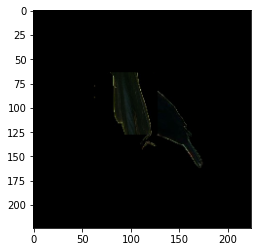

In [ ]:
combine_images(original_first_image, original_second_image, INPUT_1, OUTPUT_SIZE)